In [1]:
%matplotlib inline
import axs
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import ascii

import pyspark.sql.functions as sparkfunc

In [2]:
matplotlib.rcParams['figure.dpi'] = 120

In [3]:
def spark_start(project_path, metastore=None, local_dir=None):
    from pyspark.sql import SparkSession

    warehouse_location = project_path #os.path.join(project_path, 'spark-warehouse')

    if local_dir is None:
        local_dir = os.path.join(project_path, 'spark-tmp')

    spark = ( 
            SparkSession.builder
            .appName("LSD2")
            .config("spark.sql.warehouse.dir", warehouse_location)
            .config('spark.master', "local[6]")
            .config('spark.driver.memory', '8G') # 128
            .config('spark.local.dir', local_dir)
            .config('spark.memory.offHeap.enabled', 'true')
            .config('spark.memory.offHeap.size', '4G') # 256
            .config("spark.sql.execution.arrow.enabled", "true")
            .config("spark.driver.maxResultSize", "6G")
            .config("spark.driver.extraJavaOptions", f"-Dderby.system.home={metastore}")
            .enableHiveSupport()
            .getOrCreate()
                    )   

    return spark

spark_session = spark_start("/epyc/data/", local_dir="/epyc/users/ecbellm")

#catalog = axs.AxsCatalog(spark_session)

In [4]:
spark_session

In [5]:
catalog = axs.AxsCatalog(spark_session)

In [6]:
catalog.list_tables().keys()

dict_keys(['sdss_zoned1am_hd', 'gaia_zoned1am_hd', 'gaia_dr2_1am_dup', 'sdss_zoned1am_700lc', 'gaia_dr2_700lc2', 'allwise_1am_dup', 'gaia_sdss_wise_1asec', 'gaia_sdss_3asec', 'ztf_1am_old', 'ztf_exposures', 'ztf_1am_lc', 'ztf_1am', 'ztf_1am_test', 'sesar_rrlyrae', 'ztf_fid1_sdss_stars_lt20_2asec', 'ztf_fid2_sdss_stars_lt20_2asec', 'ztf_fid3_sdss_stars_lt20_2asec', 'sdss_dr9_qso_s82', 'ztf_sdss_dr9_qso', 'faraway_training_dataset', 'faraway_labeled_training_dataset', 'ztf_nobs100', 'jnk_ztf_test', 'jnk_ztf_test2', 'ztf1000', 'ztf_sdss_dr9_qso2', 'ztf10', 'ztf_dec18', 'asassn_variability_catalog', 'ztf10_assasn', 'ztf10_assasn_cesium', 'ztf10_assasn_best', 'ztf10_assasn_cesium_best', 'unwise_v1', 'cklein_flare', 'unwise_v2', 'cesium_speedtest_ztfsample', 'paula_listcvs', 'nemec_rrlyrae_metalicity', 'dambis_rrlyrae_metalicity', 'sdss_500b_28e_10800z', 'gaia_500b_28e_10800z', 'allwise_500b_28e_10800z', 'ztf_500b_28e_10800z', 'ztf_mar19_all'])

In [7]:
%%time
ztf = catalog.load("ztf_mar19_all")

CPU times: user 9.14 ms, sys: 5.69 ms, total: 14.8 ms
Wall time: 4.45 s


In [8]:
ztf.columns

['matchid',
 'ra',
 'dec',
 'nobs_avail',
 'combined_matchids',
 'mjd',
 'programid',
 'filterid',
 'mag',
 'magerr',
 'psfmag',
 'psfmagerr',
 'psfflux',
 'psffluxerr',
 'chi',
 'catflags',
 'sharp',
 'xpos',
 'ypos',
 'zone',
 'dup']

In [9]:
testra = 287.9869104
testdec = 13.0748496
d = 10/3600.


In [10]:
%%time
radec = ztf.region(ra1=testra-d, ra2=testra+d, dec1=testdec-d, dec2=testdec+d).select("ra", "dec").toPandas()


CPU times: user 22.2 ms, sys: 9.23 ms, total: 31.4 ms
Wall time: 20.8 s


In [11]:
len(radec)

8

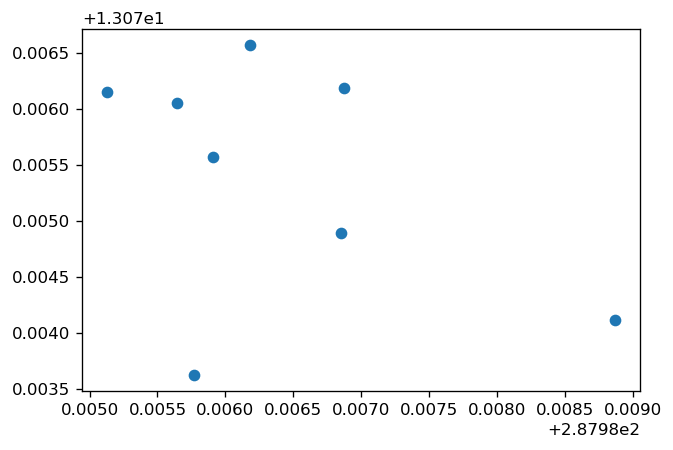

In [12]:
plt.plot(radec['ra'], radec['dec'], 'o')

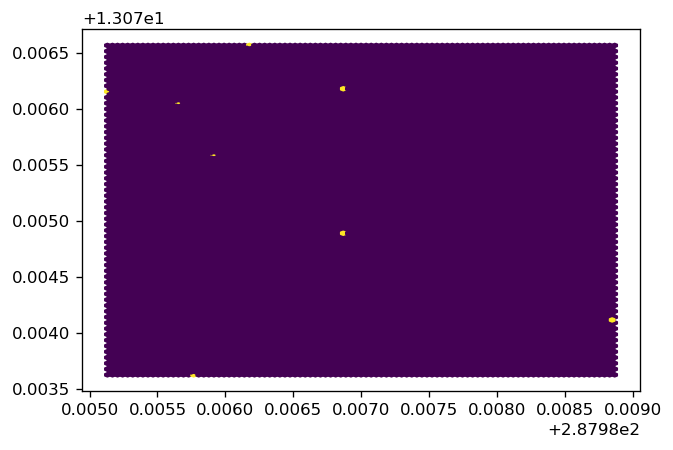

In [13]:
plt.hexbin(radec['ra'], radec['dec'])

In [9]:
gaia = catalog.load("gaia_dr2_1am_dup")

In [10]:
gaia.columns

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'astrometric_weight_al',
 'astrometric_pseudo_colour',
 'astrometric_pseudo_colour_error',
 'mean_varpi_factor_al',
 'astrometric_matched_observations',
 'visibility_periods_used',
 'astrometric_sigma5d_max',
 'frame_rotator_object_type',
 'matched_observations',
 'duplicated_source',
 'phot_g_n_ob

In [18]:
%%time
gradec = gaia.region(ra1=testra-d, ra2=testra+d, dec1=testdec-d, dec2=testdec+d).select("source_id","designation","ra", "dec").toPandas()


CPU times: user 15.9 ms, sys: 8.06 ms, total: 24 ms
Wall time: 25.1 s


In [19]:
gradec

,source_id,designation,ra,dec
0,4314064752144351104,Gaia DR2 4314064752144351104,287.985078,13.076073
1,4314064752141722880,Gaia DR2 4314064752141722880,287.985759,13.076016
2,4314064752144511104,Gaia DR2 4314064752144511104,287.986000,13.075421
3,4314064747823789440,Gaia DR2 4314064747823789440,287.986201,13.076558
4,4314064752187515520,Gaia DR2 4314064752187515520,287.986870,13.074879
5,4314064752141447168,Gaia DR2 4314064752141447168,287.988826,13.074090
6,4314064747823772032,Gaia DR2 4314064747823772032,287.989137,13.074146


In [65]:
%%time
gaia_match = ztf.region(ra1=testra-d, ra2=testra+d, dec1=testdec-d, dec2=testdec+d).crossmatch(gaia).select("matchid","combined_matchids","ra","dec","source_id","bp_rp", "phot_g_mean_mag", "phot_g_mean_flux_over_error", "parallax", "parallax_error","axsdist").toPandas()

CPU times: user 32 ms, sys: 18 ms, total: 50 ms
Wall time: 1min 10s


In [66]:
gaia_match

,matchid,combined_matchids,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist
0,539091210021486,"[539091210021486, 539091210021486, 53909121002...",287.985131,13.076150,4314064752144351104,NaN,21.252653,26.392502,NaN,NaN,1.624088e-06
1,539091200169560,"[539091200169560, 539091200169560, 53909120016...",287.985645,13.076053,4314064752141722880,1.962526,20.610218,136.230728,1.294866,1.226691,2.097511e-06
2,539091200144433,"[539091200144433, 539091200144433, 53909120014...",287.985909,13.075576,4314064752144511104,NaN,21.399178,32.201534,NaN,NaN,3.141761e-06
3,539091200095877,"[539091200095877, 539091200095877, 53909120009...",287.986180,13.076569,4314064747823789440,1.894012,20.256207,192.555542,-0.059701,0.735873,4.163692e-07
4,539091200095931,"[539091200095931, 539091200095931, 53909120009...",287.986855,13.074891,4314064752187515520,2.932623,19.596601,291.541779,0.867655,0.563483,3.282545e-07
5,539091200022594,"[539091200022594, 539091200022594, 53909120002...",287.988869,13.074118,4314064752141447168,2.656782,20.182062,183.464554,0.272276,0.933420,8.878370e-07
6,539091200022594,"[539091200022594, 539091200022594, 53909120002...",287.988869,13.074118,4314064747823772032,NaN,20.916426,68.139877,NaN,NaN,4.706981e-06


Note that rows 5 & 6 have the same ztf matchid, so have matched multiple Gaia sources (indicated by different `source_id`s) within the 1" crossmatch radius.  Do we just use the closer one (in which case we could just use `return_min=True`), or can we compare brightness?

In [67]:
gaia_match['axsdist']*3600

0    0.005847
1    0.007551
2    0.011310
3    0.001499
4    0.001182
5    0.003196
6    0.016945
Name: axsdist, dtype: float64

In [68]:
gaia_match['median_ztf_r_mag'] = gaia_match.apply(lambda x: np.median(x.mag[x.filterid == 2]), axis=1)

AttributeError: ("'Series' object has no attribute 'mag'", 'occurred at index 0')

In [24]:
gaia_match['median_ztf_r_mag']

0    20.875589
1    20.703602
2    21.043415
3    20.641129
4    20.290142
5    20.225367
6    20.225367
Name: median_ztf_r_mag, dtype: float64

In [25]:
gaia_match['phot_g_mean_mag']

0    21.252653
1    20.610218
2    21.399178
3    20.256207
4    19.596601
5    20.182062
6    20.916426
Name: phot_g_mean_mag, dtype: float32

So we should decide how to downselect to a single Gaia source per AXS ZTF source, using position and/or magnitude...

We'd also like to break out the matchids from individual matchfiles so we can 

In [69]:
gaia_match.combined_matchids

0    [539091210021486, 539091210021486, 53909121002...
1    [539091200169560, 539091200169560, 53909120016...
2    [539091200144433, 539091200144433, 53909120014...
3    [539091200095877, 539091200095877, 53909120009...
4    [539091200095931, 539091200095931, 53909120009...
5    [539091200022594, 539091200022594, 53909120002...
6    [539091200022594, 539091200022594, 53909120002...
Name: combined_matchids, dtype: object

In [70]:
gaia_match['unique_matchids'] = gaia_match['combined_matchids'].apply(lambda x: list(set(x)))

In [72]:
gaia_match

,matchid,combined_matchids,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,unique_matchids
0,539091210021486,"[539091210021486, 539091210021486, 53909121002...",287.985131,13.076150,4314064752144351104,NaN,21.252653,26.392502,NaN,NaN,1.624088e-06,[539091210021486]
1,539091200169560,"[539091200169560, 539091200169560, 53909120016...",287.985645,13.076053,4314064752141722880,1.962526,20.610218,136.230728,1.294866,1.226691,2.097511e-06,[539091200169560]
2,539091200144433,"[539091200144433, 539091200144433, 53909120014...",287.985909,13.075576,4314064752144511104,NaN,21.399178,32.201534,NaN,NaN,3.141761e-06,[539091200144433]
3,539091200095877,"[539091200095877, 539091200095877, 53909120009...",287.986180,13.076569,4314064747823789440,1.894012,20.256207,192.555542,-0.059701,0.735873,4.163692e-07,[539091200095877]
4,539091200095931,"[539091200095931, 539091200095931, 53909120009...",287.986855,13.074891,4314064752187515520,2.932623,19.596601,291.541779,0.867655,0.563483,3.282545e-07,[539091200095931]
5,539091200022594,"[539091200022594, 539091200022594, 53909120002...",287.988869,13.074118,4314064752141447168,2.656782,20.182062,183.464554,0.272276,0.933420,8.878370e-07,[539091200022594]
6,539091200022594,"[539091200022594, 539091200022594, 53909120002...",287.988869,13.074118,4314064747823772032,NaN,20.916426,68.139877,NaN,NaN,4.706981e-06,[539091200022594]


In [73]:
gaia_match = gaia_match.drop('combined_matchids',axis=1)

In [74]:
gaia_match.columns

Index(['matchid', 'ra', 'dec', 'source_id', 'bp_rp', 'phot_g_mean_mag',
       'phot_g_mean_flux_over_error', 'parallax', 'parallax_error', 'axsdist',
       'unique_matchids'],
      dtype='object')

In [11]:
#https://stackoverflow.com/questions/27263805/pandas-when-cell-contents-are-lists-create-a-row-for-each-element-in-the-list
def explode_list_in_row(df):
    column_to_explode = 'unique_matchids'
    other_cols = [x for x in df.columns if x != column_to_explode]
    res = (df
       .set_index(other_cols)[column_to_explode]
       .apply(pd.Series)
       .stack()
       .reset_index())
    res = res.rename(columns={
          res.columns[-2]:'exploded_{}_index'.format(column_to_explode),
          res.columns[-1]: '{}_exploded'.format(column_to_explode)})
    return res

Note `explode_list_in_row` won't work if other columns (e.g., mag, filterid) are also lists

In [77]:
explode_list_in_row(gaia_match[['matchid','source_id','ra', 'dec',  'bp_rp',
       'phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'parallax',
       'parallax_error',  'unique_matchids']])

,matchid,source_id,ra,dec,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,exploded_unique_matchids_index,unique_matchids_exploded
0,539091210021486,4314064752144351104,287.985131,13.076150,NaN,21.252653,26.392502,NaN,NaN,0,539091210021486
1,539091200169560,4314064752141722880,287.985645,13.076053,1.962526,20.610218,136.230728,1.294866,1.226691,0,539091200169560
2,539091200144433,4314064752144511104,287.985909,13.075576,NaN,21.399178,32.201534,NaN,NaN,0,539091200144433
3,539091200095877,4314064747823789440,287.986180,13.076569,1.894012,20.256207,192.555542,-0.059701,0.735873,0,539091200095877
4,539091200095931,4314064752187515520,287.986855,13.074891,2.932623,19.596601,291.541779,0.867655,0.563483,0,539091200095931
5,539091200022594,4314064752141447168,287.988869,13.074118,2.656782,20.182062,183.464554,0.272276,0.933420,0,539091200022594
6,539091200022594,4314064747823772032,287.988869,13.074118,NaN,20.916426,68.139877,NaN,NaN,0,539091200022594


In [12]:
high_cadence_fields = [538, 539, 436, 437, 638, 639, 488, 489, 540, 541, 591,  592, 685, 686]

In [13]:
df_field_corners = pd.read_csv('/epyc/users/ecbellm/ztf_information/field_grid/ztf_field_corners.csv',index_col='field')

In [14]:
df_field_corners.loc[high_cadence_fields]

,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4
field,,,,,,,,
538,281.710718,15.503930,281.616071,7.951467,274.174923,7.937529,274.057181,15.488780
539,288.685828,15.503930,288.591181,7.951467,281.150033,7.937529,281.032291,15.488780
436,288.060719,1.134272,288.091636,-6.418696,280.675351,-6.432445,280.684370,1.119680
437,295.089569,1.134272,295.120486,-6.418696,287.704201,-6.432445,287.713220,1.119680
638,290.005227,29.868941,289.748815,22.319413,281.781821,22.305275,281.499349,29.853153
639,297.486937,29.868941,297.230525,22.319413,289.263531,22.305275,288.981059,29.853153
488,291.829110,8.319381,291.798747,0.766411,284.428466,0.752567,284.375789,8.304515
489,298.839990,8.319381,298.809627,0.766411,291.439346,0.752567,291.386669,8.304515
540,295.740508,15.503930,295.645861,7.951467,288.204713,7.937529,288.086971,15.488780


In [15]:
minra = df_field_corners.loc[high_cadence_fields,['ra1','ra2','ra3','ra4']].min(axis=1)
maxra = df_field_corners.loc[high_cadence_fields,['ra1','ra2','ra3','ra4']].max(axis=1)
mindec = df_field_corners.loc[high_cadence_fields,['dec1','dec2','dec3','dec4']].min(axis=1)
maxdec = df_field_corners.loc[high_cadence_fields,['dec1','dec2','dec3','dec4']].max(axis=1)

In [16]:
!mkdir -p gaia_match

In [17]:
%%time
for field in high_cadence_fields:
    print(field)
    gaia_match = ztf.region(ra1=minra[field], ra2=maxra[field], dec1=mindec[field], dec2=maxdec[field]).crossmatch(gaia, return_min=True).select("matchid","combined_matchids","ra","dec","source_id","bp_rp", "phot_g_mean_mag", "phot_g_mean_flux_over_error", "parallax", "parallax_error","axsdist").toPandas()
    gaia_match['unique_matchids'] = gaia_match.combined_matchids.apply(lambda x: list(set(x)))
    gaia_match = gaia_match.drop('combined_matchids',axis=1)
    gaia_match = explode_list_in_row(gaia_match)
    gaia_match.to_hdf(f'gaia_match/gaia_match_{field}.h5','table')

538
539
436
437
638
639
488
489
540
541
591
592
685
686
CPU times: user 4h 22min 36s, sys: 27min 27s, total: 4h 50min 4s
Wall time: 3h 59min 47s


In [4]:
# example of reading in the data

df_xmatch = pd.read_hdf('gaia_match/gaia_match_538.h5','table')

In [5]:
df_xmatch.head()

,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,exploded_unique_matchids_index,unique_matchids_exploded
0,2.358892,20.794220,16.836946,NaN,NaN,0,5.380422e+14
1,1.534471,15.856194,1289.579346,1.530306,0.043025,0,5.380422e+14
2,1.286993,19.807268,167.270676,0.840598,0.518436,0,5.380422e+14
3,1.190068,16.152426,1201.452515,0.674399,0.052111,0,5.380422e+14
4,NaN,19.923656,147.267273,1.200928,0.571057,0,5.380422e+14


In [11]:
df_xmatch.exploded_unique_matchids_index.max()

15

In [10]:
df_xmatch.dtypes

bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
exploded_unique_matchids_index      int64
unique_matchids_exploded          float64
dtype: object

uhoh, the matchids have turned into floats...

In [12]:
df_xmatch['unique_matchids_exploded'].astype(int).head()

0    538042210088746
1    538042210034044
2    538042210035152
3    538042210032923
4    538042210032773
Name: unique_matchids_exploded, dtype: int64

Let's convert the matchids back to ints and make them the index:

In [13]:
df_xmatch['unique_matchids_exploded'] = df_xmatch['unique_matchids_exploded'].astype(int)

In [15]:
df_xmatch = df_xmatch.set_index('unique_matchids_exploded')

So now given a matchid we can get the Gaia parameters:

In [16]:
df_xmatch.loc[538042210088746]

bp_rp                              2.358892
phot_g_mean_mag                   20.794220
phot_g_mean_flux_over_error       16.836946
parallax                                NaN
parallax_error                          NaN
exploded_unique_matchids_index     0.000000
Name: 538042210088746, dtype: float64

This assumes we want to look up Gaia values per matchid.  If we only want unique Gaia measurements, then we should restrict ourselves to `exploded_unique_matchids_index = 0` only.

In [17]:
len(df_xmatch)

4253348

In [18]:
np.sum(df_xmatch.exploded_unique_matchids_index == 0)

3559533